# Leveraging Machine Learning to Combat Bushmeat Poaching and Illegal Logging in Arabuko-Sokoke Forest Reserve, Kenya

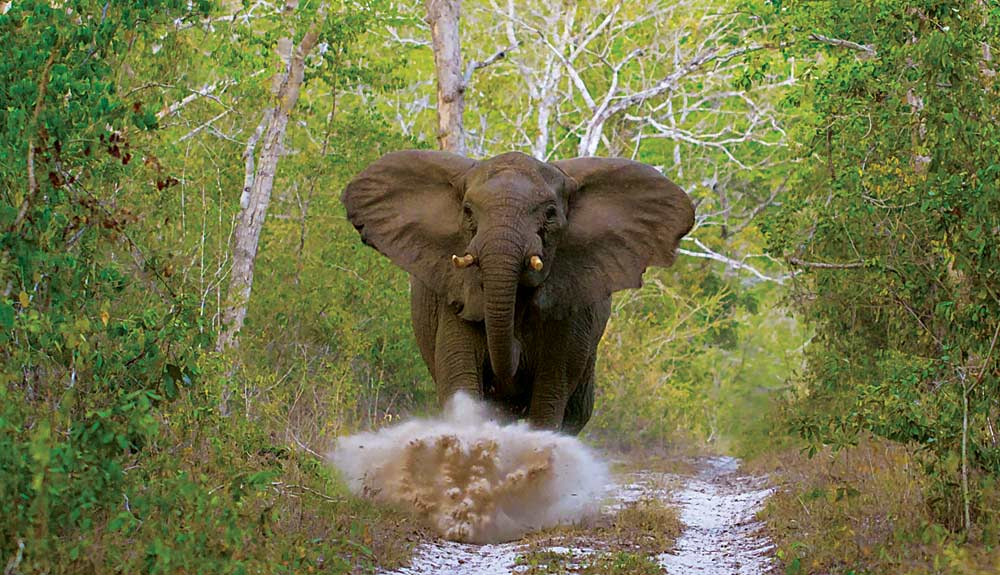

In [1]:
from IPython.display import display, Image
image_path = r"C:\Users\hp\Desktop\phase 5\Elephant (1).jpg"

display(Image(filename=image_path))



### Problem Statement:
The Arabuko-Sokoke Forest (ASF), a UNESCO Man and Biosphere Reserve and a crucial biodiversity hotspot, faces persistent threats from illegal poaching and logging. These activities are primarily driven by the high demand for forest products from nearby urban centers such as Malindi, Watamu, Kilifi, and Mombasa, as well as the presence of over 200,000 people living at the forest boundary. These threats endanger the integrity of the forest ecosystem, its biodiversity, and the livelihoods of local communities’ dependent on its resources. Effective strategies are needed to combat illegal utilization of forest resources and safeguard the ecological and socio-economic value of ASF.    

### General Objectives:
To leverage machine learning techniques for combating illegal poaching and logging activities in the Arabuko-Sokoke Forest (ASF) by analyzing historical data to develop predictive models that guide conservation interventions and law enforcement strategies.

### Specific Objectives:
i. Utilize time series analysis techniques, including ARIMA, VAR, and XGBoost, to develop predictive models for forecasting illegal logging and bushmeat poaching activities in ASF.    
ii. Identify trends and patterns of illegal logging and poaching activities in ASF through comprehensive analysis of historical data.   
iii. Compare the performance of different machine learning algorithms, including ARIMA, VAR, and XGBoost, in predicting and understanding illegal logging and poaching patterns in ASF.   
iv. Evaluate the practical implications of the predictive models in informing conservation strategies and policy decisions aimed at safeguarding ASF's ecological integrity and supporting local communities.   

#### Research Questions:
i. How effectively can time series analysis techniques, such as ARIMA, VAR, and XGBoost, forecast illegal logging and bushmeat poaching activities in ASF based on historical data?    
ii. What are the primary seasonal, temporal, and spatial drivers influencing illegal logging and poaching activities in ASF, as revealed by the analysis?    
iii. Among the utilized machine learning algorithms, namely ARIMA, VAR, and XGBoost, which demonstrate the highest efficacy in predicting and understanding illegal logging and poaching patterns in ASF?    
iv. How can the actionable insights derived from these predictive models contribute to the development and implementation of effective conservation strategies and policies for ASF, considering ecological preservation and community livelihoods?    


### 1. Data Collection   



### 2. Data Understanding and Preprocessing   
Column details     
a. Waypoint Date: The date the observation of illegal activity was encountered, also known as the patrol date     
b. Waypoint Time: The time when the illegal activity was encountered      
c. Eastings/Longitude: Longitude of the illegal activity incident     
d. Northings/Latitude: latitude of the illegal activity incident   
e. Illegal Activity: the main overall category of illegal activity   
f. Observation Category 1: the subcategory of illegal activity  
g. Observation Category 2: The exact illegal activity incident   
h. Action Taken Camp: What happened when a carving camp was encountered   
i. Action Taken Items: What happened to the items encountered at an incident of illegal activity   
j. Action Taken People   
k. Arrested For: Kind of illegal activity committed    
l. Home Town: Home town of the suspect   
m. Is Active: Is the trap active or not   
n. Location Of Fire: Village name close to the forest where the fire happened    
o. Count: Number of observations of an incident of illegal activity   
p. Status   
q. Timber Tree Species: Plant species of destroyed/exploited trees   
r. Trap Size: Size of trap targeting animal species for bushmeat poaching   
s. Type of Cutting Tool: Saw, machete, axe….   
t. Type of Human Sign: Any sign or trace of a sign showing the presence of human activity   
u. Type of Trap: Snare or trap    
v. Year: Year of the illegal activity observation   


In [2]:
#import necessary libraries 
import seaborn as sns
#import geopandas as gpd
#import contextily as ctx
#import folium 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings ("ignore")

In [3]:
#load and preview dataset first 5 observations
#parse waypoint date to datetime datatype using parse_date
illegal_df = pd.read_csv("Illegal activities (1).csv", low_memory= False, index_col= False, parse_dates = ['Waypoint Date'], encoding = 'utf-8' )
illegal_df.head(5)

,Waypoint Date,Waypoint Time,X,Y,Observation Category 0,Observation Category 1,Observation Category 2,Action Taken Camp,Action Taken Items,Action Taken People,...,Count,Reason For,Sex,Status,Timber Tree Species,Trap Size,Type of Cutting Tool,Type of Human Sign,Type of Trap,Type of Weapon
0,2019-11-28,6:52:34 AM,601081.5188,9639489.998,Human Activity,People - indirect sign,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Footprint,NaN,NaN
1,2021-04-06,2:06:49 PM,590817.0001,9618274.553,Human Activity,People,NaN,NaN,NaN,Arrested,...,1,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-06,2:06:49 PM,590817.0001,9618274.553,Cutting Tools,NaN,NaN,NaN,Collected,NaN,...,2,NaN,NaN,NaN,NaN,NaN,Handsaw,NaN,NaN,NaN
3,2021-04-06,2:06:49 PM,590817.0001,9618274.553,Human Activity,Timber,Building Poles,NaN,Collected,NaN,...,2,NaN,NaN,NaN,Hard Wood,NaN,NaN,NaN,NaN,NaN
4,2021-07-10,11:09:13 AM,610882.8643,9636109.150,Human Activity,Timber,Cut branches,NaN,Observed Only,NaN,...,1,NaN,NaN,NaN,Hard Wood,NaN,NaN,NaN,NaN,NaN


In [4]:
#descriptive summary or information of the dataframe
illegal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18762 entries, 0 to 18761
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Waypoint Date           18762 non-null  datetime64[ns]
 1   Waypoint Time           18762 non-null  object        
 2   X                       18762 non-null  float64       
 3   Y                       18762 non-null  float64       
 4   Observation Category 0  18762 non-null  object        
 5   Observation Category 1  8738 non-null   object        
 6   Observation Category 2  6904 non-null   object        
 7   Action Taken Camp       61 non-null     object        
 8   Action Taken Items      16769 non-null  object        
 9   Action Taken People     297 non-null    object        
 10  Age of Sign             7812 non-null   object        
 11  Arrested For            282 non-null    object        
 12  Comment                 7895 non-null   object

In [5]:
#Dropping unneccessary columns 
feature = illegal_df[['Name or Names', 'National ID Number','Sex',"Reason For","Age of Sign","Comment"]]
illegal_df = illegal_df.drop(columns= feature, axis =1)

# Dropping rows where "Observation Category 1" is 'People - indirect sign'
illegal_df = illegal_df[illegal_df["Observation Category 1"] != 'People - indirect sign']
illegal_df = illegal_df[illegal_df["Observation Category 1"] != 'Infrastructure & Roads']

illegal_df["Observation Category 1"].unique()

array(['People', nan, 'Timber', 'Camp', 'Fire'], dtype=object)

In [6]:

# some of the columns are extrapolation of other columns, to deal with that we create two functions

#1. Function which categorizes observations into logging and poaching

def categorize_entries(row):
    """
    This function categorizes observtion category 0 into poaching and logging 
    using columns Arrested For and observation category 1
    """
    if row['Observation Category 0'] == 'Traps and Snares':
        return 'Poaching'
    elif row['Observation Category 0'] == 'Cutting Tools':
        return 'Logging'
    elif row['Observation Category 0'] == 'Weapons':
        return 'Poaching'
    elif row['Observation Category 0'] == 'Human Activity':
        if row['Observation Category 1'] in ['Timber', 'Camp', 'Fire']:
            return 'Logging'
        elif row['Observation Category 1'] == 'People':
            if row['Arrested For'] == 'Hunting':
                return 'Poaching'
            else:
                return 'Logging'
    return row['Observation Category 0'] 

# Apply the function to the dataframe
illegal_df['Observation Category 0'] = illegal_df.apply(categorize_entries, axis=1)

In [7]:
#check value counts for observation category 0
illegal_df['Observation Category 0'].value_counts()

Poaching    9860
Logging     7455
Name: Observation Category 0, dtype: int64

In [8]:

#2.a function that loops and reads all unique values in the dataframe
#inorder to read missing value and analyze how to replace with appropriate special character
def unique_values(data): 
    # create a dictionary of columns and unique values in it
    
    #create an empty list
    distinct_values = {}
    
    #loop over each column in the list to create dictionary with unique values 
    for cols in data.columns:
        distinct_values[cols] = data[cols].unique()
        
        #print all each column with its respective unique value
    for keys,values in distinct_values.items():
            print (keys,":-", values)
            
# print the unique values for each column
unique_values(illegal_df)

Waypoint Date :- ['2021-04-06T00:00:00.000000000' '2021-07-10T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' ... '2021-11-25T00:00:00.000000000'
 '2019-10-15T00:00:00.000000000' '2023-07-13T00:00:00.000000000']
Waypoint Time :- ['2:06:49 PM' '11:09:13 AM' '4:31:27 PM' ... '10:21:54 AM' '10:25:14 AM'
 '12:27:12 PM']
X :- [590817.0001 610882.8643 595069.2919 ... 592281.443  592450.3033
 602504.988 ]
Y :- [9618274.553 9636109.15  9613245.    ... 9626030.588 9638909.037
 9635392.48 ]
Observation Category 0 :- ['Logging' 'Poaching']
Observation Category 1 :- ['People' nan 'Timber' 'Camp' 'Fire']
Observation Category 2 :- [nan 'Building Poles' 'Cut branches' 'Cut Stems' 'Charcoal' 'Firewood'
 'Logs' 'Fitoes' 'Planks' 'Carving']
Action Taken Camp :- [nan 'Observed Only' 'Destroyed']
Action Taken Items :- [nan 'Collected' 'Observed Only' 'Destroyed' 'Confiscated']
Action Taken People :- ['Arrested' nan 'Unsuccessful Pursuit' 'Verbal Warning' 'Written Warning'
 'Observed Only']
Arrested F

In [9]:

# Inorder to fill missing values and replace (with) appropriate values 

# create a column: value dictionary for fill

appropriate_characters = {
    "Type of Weapon": "No weapon",
    "Type of Trap": "No trap",
    "Type of Human Sign": "Absence of Human sign",
    "Type of Cutting Tool": "No Cutting Tool",
    "Trap Size": "No Trap",
    "Timber Tree Species": "Other",
    "Status": "No Camp",
    "Location Of Fire": "Other",
    "Is Active": "Not applicable",
    "Action Taken People": "No arrest",
    "Action Taken Items": "No Item",
    "Action Taken Camp": "No Camp",
    "Observation Category 2": "Not applicable",
    "Home Town":"Other",
    "Arrested For":"No Arrest"
}

# loop over each column to fill missing values 
"""
This loops checks for all missing values and replaces the missing values
with appropriate characters that provide insights to the data
"""
for cols, appropriate_characters in appropriate_characters.items():
    illegal_df[cols] = illegal_df[cols].fillna(appropriate_characters)

# preview new dataset using the unique_values() function
unique_values(illegal_df)


Waypoint Date :- ['2021-04-06T00:00:00.000000000' '2021-07-10T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' ... '2021-11-25T00:00:00.000000000'
 '2019-10-15T00:00:00.000000000' '2023-07-13T00:00:00.000000000']
Waypoint Time :- ['2:06:49 PM' '11:09:13 AM' '4:31:27 PM' ... '10:21:54 AM' '10:25:14 AM'
 '12:27:12 PM']
X :- [590817.0001 610882.8643 595069.2919 ... 592281.443  592450.3033
 602504.988 ]
Y :- [9618274.553 9636109.15  9613245.    ... 9626030.588 9638909.037
 9635392.48 ]
Observation Category 0 :- ['Logging' 'Poaching']
Observation Category 1 :- ['People' nan 'Timber' 'Camp' 'Fire']
Observation Category 2 :- ['Not applicable' 'Building Poles' 'Cut branches' 'Cut Stems' 'Charcoal'
 'Firewood' 'Logs' 'Fitoes' 'Planks' 'Carving']
Action Taken Camp :- ['No Camp' 'Observed Only' 'Destroyed']
Action Taken Items :- ['No Item' 'Collected' 'Observed Only' 'Destroyed' 'Confiscated']
Action Taken People :- ['Arrested' 'No arrest' 'Unsuccessful Pursuit' 'Verbal Warning'
 'Written War

In [10]:
# Define mapping for filling NaN values in Observation Category 1
mapping = {
    'Logging': 'Timber',
    'Poaching': 'People'
}

# Fill NaN values in Observation Category 1 based on Observation Category 0
illegal_df['Observation Category 1'] = illegal_df['Observation Category 1'].fillna(illegal_df['Observation Category 0'].map(mapping))

#check value counts for Observation Category 1
illegal_df['Observation Category 1'].value_counts()

People    10153
Timber     7090
Camp         63
Fire          9
Name: Observation Category 1, dtype: int64

In [11]:
#change columns names of X,Y to Eastings and Northings 
illegal_df.rename(columns={"X": "Eastings/Longitude","Y":"Northings/Latitude"}, inplace= True)
illegal_df.rename(columns={"Observation Category 0": "Illegal Activity"}, inplace= True)
#change datatype of Eastings and Northings to strings from float, they are unique IDs
illegal_df["Eastings/Longitude"] = illegal_df["Eastings/Longitude"]#.astype(str)
illegal_df["Northings/Latitude"] = illegal_df["Northings/Latitude"]#.astype(str)


In [12]:
#reset index to deal with difference in observations and rows
illegal_df.reset_index(drop=True, inplace=True)

#recheck missing values
illegal_df.isna().sum()

Waypoint Date             0
Waypoint Time             0
Eastings/Longitude        0
Northings/Latitude        0
Illegal Activity          0
Observation Category 1    0
Observation Category 2    0
Action Taken Camp         0
Action Taken Items        0
Action Taken People       0
Arrested For              0
Home Town                 0
Is Active                 0
Location Of Fire          0
Count                     0
Status                    0
Timber Tree Species       0
Trap Size                 0
Type of Cutting Tool      0
Type of Human Sign        0
Type of Trap              0
Type of Weapon            0
dtype: int64

In [13]:
#preview duplicates 
illegal_df[illegal_df.duplicated(keep = "last")]

,Waypoint Date,Waypoint Time,Eastings/Longitude,Northings/Latitude,Illegal Activity,Observation Category 1,Observation Category 2,Action Taken Camp,Action Taken Items,Action Taken People,...,Is Active,Location Of Fire,Count,Status,Timber Tree Species,Trap Size,Type of Cutting Tool,Type of Human Sign,Type of Trap,Type of Weapon
8,2021-03-20,11:46:39 AM,607604.4413,9634382.198,Logging,Timber,Cut Stems,No Camp,Observed Only,No arrest,...,Not applicable,Other,1,No Camp,Hard Wood,No Trap,No Cutting Tool,Absence of Human sign,No trap,No weapon
10,2019-09-17,10:06:18 AM,608482.5190,9643616.399,Logging,Timber,Cut Stems,No Camp,Observed Only,No arrest,...,Not applicable,Other,1,No Camp,Hard Wood,No Trap,No Cutting Tool,Absence of Human sign,No trap,No weapon
62,2020-12-12,9:30:41 AM,596561.3664,9623815.043,Poaching,People,Not applicable,No Camp,Collected,No arrest,...,Yes,Other,1,No Camp,Other,Small,No Cutting Tool,Absence of Human sign,Snare,No weapon
63,2020-12-12,9:30:41 AM,596561.3664,9623815.043,Poaching,People,Not applicable,No Camp,Collected,No arrest,...,Yes,Other,1,No Camp,Other,Small,No Cutting Tool,Absence of Human sign,Snare,No weapon
99,2019-11-26,11:22:16 AM,592893.7182,9638858.839,Poaching,People,Not applicable,No Camp,Collected,No arrest,...,Yes,Other,1,No Camp,Other,Small,No Cutting Tool,Absence of Human sign,Snare,No weapon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17254,2019-05-22,4:19:37 PM,609291.6240,9636628.443,Logging,Timber,Cut Stems,No Camp,Observed Only,No arrest,...,Not applicable,Other,1,No Camp,Hard Wood,No Trap,No Cutting Tool,Absence of Human sign,No trap,No weapon
17267,2019-07-04,11:17:00 AM,592361.2483,9637782.562,Poaching,People,Not applicable,No Camp,Collected,No arrest,...,Yes,Other,1,No Camp,Other,Small,No Cutting Tool,Absence of Human sign,Snare,No weapon
17290,2020-11-29,9:44:30 AM,593622.7778,9638307.009,Poaching,People,Not applicable,No Camp,Collected,No arrest,...,Yes,Other,1,No Camp,Other,Small,No Cutting Tool,Absence of Human sign,Snare,No weapon
17307,2020-11-08,7:48:49 AM,603553.3033,9632140.235,Poaching,People,Not applicable,No Camp,Collected,No arrest,...,Yes,Other,1,No Camp,Other,Small,No Cutting Tool,Absence of Human sign,Snare,No weapon


In [14]:
#drop all duplicates
illegal_df.drop_duplicates(inplace= True)

#check duplicates 
illegal_df.duplicated().sum()

0

# 3. EXPLORATORY DATA ANALYSIS

1. Geospatial Analysis 

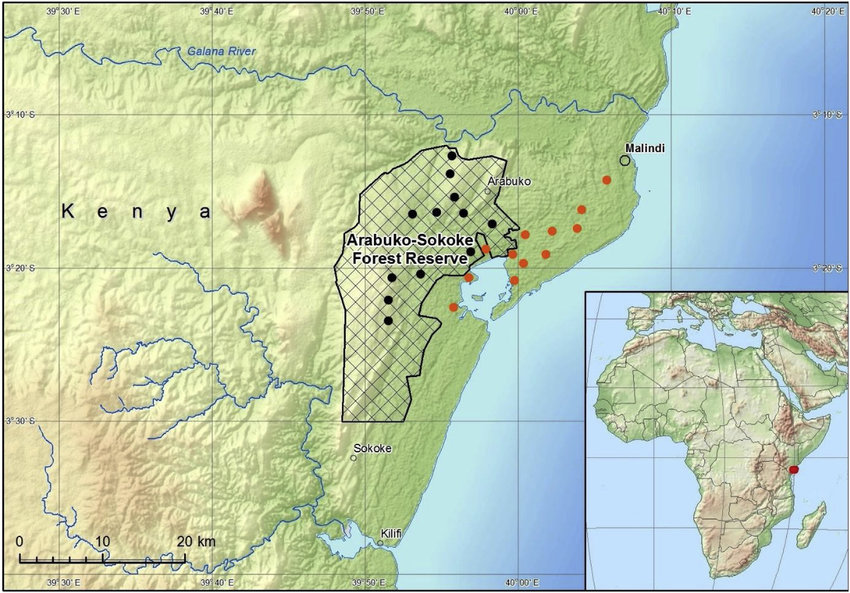

In [15]:
image_path = r"C:\Users\hp\Desktop\phase 5\MAP.png"

display(Image(filename=image_path))

Arabuko Sokoke Forest

### TIME SERIES ANALYSIS

2.Seasonal Analysis



In [16]:
#selecting appropriate columns for time series 
time_data = illegal_df[["Waypoint Date", "Illegal Activity"]]
time_data = time_data.groupby(["Waypoint Date", "Illegal Activity"]).size().unstack()

#check for any values missing since the categoricals are unstacked
time_data.isna().sum()

Illegal Activity
Logging     207
Poaching    482
dtype: int64

In [17]:
#fill missing values in each column with zero, since where there is poaching there is no loggging and vice versa
time_data = time_data.fillna(0)
time_data.isna().sum()

Illegal Activity
Logging     0
Poaching    0
dtype: int64

In [18]:
#create a copy of time series data for modelling
time_data_copy = time_data.copy()
time_data.head(2)


Illegal Activity,Logging,Poaching
Waypoint Date,,
2014-01-15,2.0,0.0
2018-03-29,15.0,7.0


In [19]:
#reset index
time_data.reset_index("Waypoint Date")

print("The index is now:", time_data.index.name,"\n")
time_data.info()

The index is now: Waypoint Date 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1574 entries, 2014-01-15 to 2024-04-03
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Logging   1574 non-null   float64
 1   Poaching  1574 non-null   float64
dtypes: float64(2)
memory usage: 36.9 KB


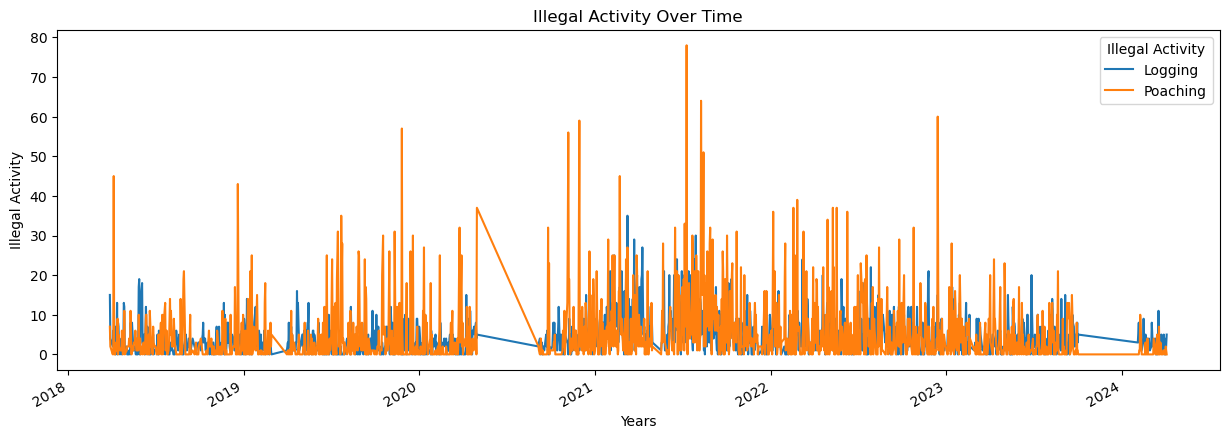

In [20]:
#Visualizing illegal activities over years
yearly_data = time_data["2018":]
yearly_data.plot(figsize = (15,5),
               title = "Illegal Activity Over Time",
               xlabel = "Years",
               ylabel= "Illegal Activity");

The graph shows trends and pattern in illegal activities from 2018 to 2024. Comparing and contrasting poaching and logging, the graph shows poaching exceeds logging activities over the years. 

In [21]:

#extract month fr
#feature engineer new dataframe 
time_data = illegal_df[["Waypoint Date","Illegal Activity"]]

#change datatype to datetime type 
time_data['Waypoint Date'] = pd.to_datetime(time_data['Waypoint Date'], format='%d-%b-%y')

#Grouping time_data using "Waypoint Date" and categorize the different illegal activities
#using unstuck to reshape the selected data, this categorize poaching and logging into separate columns
illegal_activities = time_data.groupby(["Waypoint Date","Illegal Activity"]).size().unstack()
# Forward fill missing values
time_data_filled = time_data.fillna(method='ffill')
#set waypoint date as index
time_data.set_index('Waypoint Date', inplace= True)
# Convert 'Waypoint Date' to datetime format
illegal_df['Waypoint Date'] = pd.to_datetime(illegal_df['Waypoint Date'])

# Extract month from 'Waypoint Date'
illegal_df['Month'] = illegal_df['Waypoint Date'].dt.month

# Group the data by month
monthly_data = time_data.groupby(pd.Grouper(freq="M"))

# Calculate the frequency counts of "Illegal Activity" for each month
monthly_freq = monthly_data['Illegal Activity'].value_counts().unstack()

# Forward fill missing values
monthly_freq = monthly_freq.fillna(method='ffill')


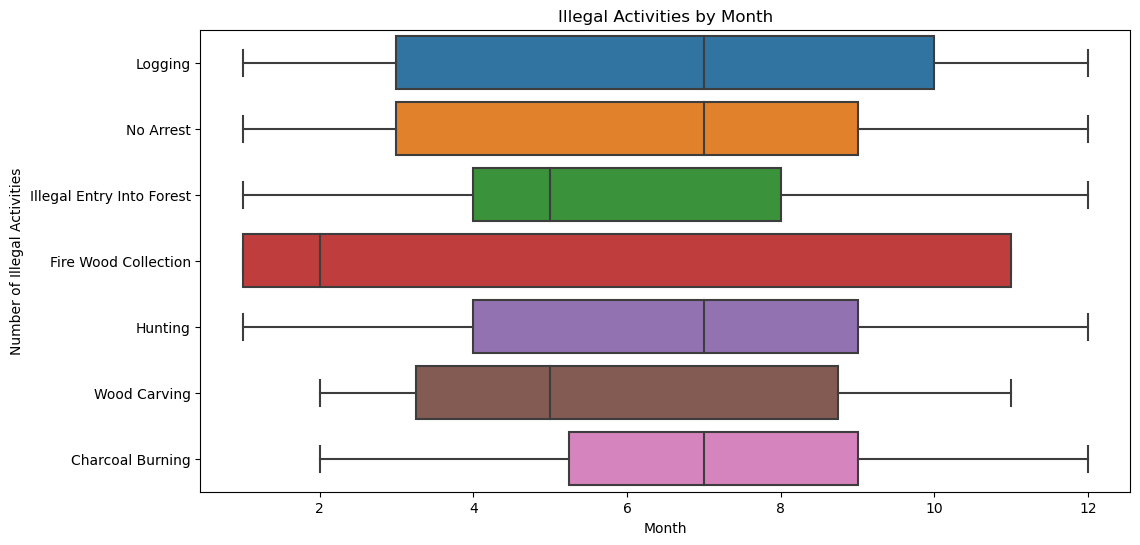

In [22]:
# Convert "Waypoint Date" column to datetime type
illegal_df['Waypoint Date'] = pd.to_datetime(illegal_df['Waypoint Date'])

# Extracting month and year for analysis
illegal_df['Month'] = illegal_df['Waypoint Date'].dt.month
illegal_df['Year'] = illegal_df['Waypoint Date'].dt.year

# Plotting illegal activities by month
plt.figure(figsize=(12, 6))
sns.boxplot(data=illegal_df, x='Month', y='Arrested For')
plt.title('Illegal Activities by Month')
plt.xlabel('Month')
plt.ylabel('Number of Illegal Activities')
plt.show()

This graph shows trends and patterns of monthly illegal activities over the years

3.Temporal Analysis

In [23]:
#feature engineering index 
# Extract month from 'Waypoint Date'
#monthly_data = time_data['Month']
time_data['Month'] = time_data.index.month

#reset index 
time_data.set_index("Month", inplace=True)


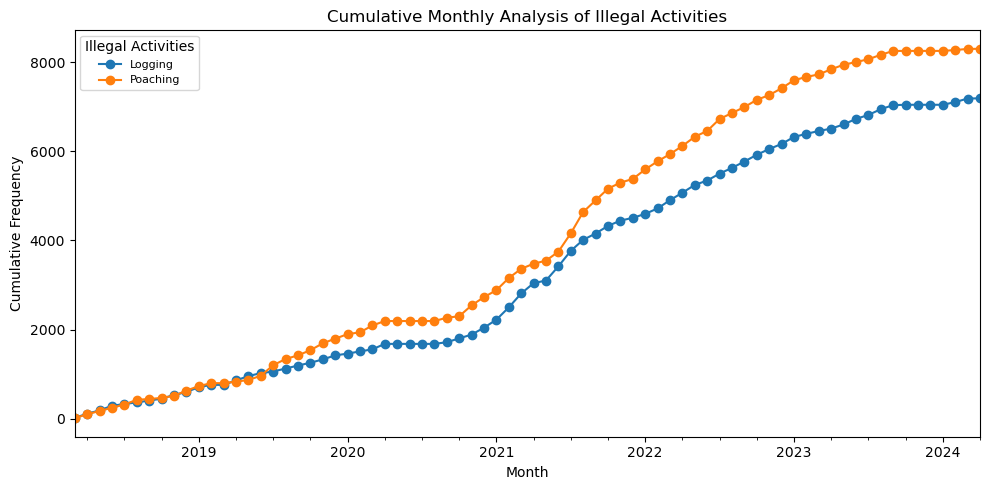

In [24]:
#group data by months and visualize 

# Group the data by month
monthly_data = yearly_data.groupby(pd.Grouper(freq="MS"))

# Calculate the cumulative sum of "Illegal Activity" for each month
monthly_cumulative = monthly_data.sum().cumsum()

# Plot cumulative monthly analysis
monthly_cumulative.plot(figsize=(10, 5), marker='o', linestyle='-')

# Labels and titles
plt.title("Cumulative Monthly Analysis of Illegal Activities")
plt.xlabel("Month")
plt.ylabel("Cumulative Frequency")
plt.legend(title="Illegal Activities", fontsize=8)

# Show plot
plt.tight_layout()
plt.show()

### **Interpretations**
>Graph shows positive trend: the illegal activities increases with time (2018 to 2024)   
The mean is not constant:  The average illegal activities varies with time   
The variance is not constant: The variance of illegal activities is subject to time     

In conclusion:   
The time series analysis shows that the time series data is non-stationary   
In the next step we will remove non-stationarity before modelling    

## TIME SERIES MODELLING

### Testing and Confirming  Stationary 
using
>a. Augmented Dickey-Fuller (ADF) test    
>b. Rolling statistics 

Results of Dickey-Fuller Test for Logging:

Test Statistic: -3.651404572984793
p-value: 0.00485100186081672
Number of Observations Used: 1548
Critical Values:
   1%: -3.4345813803729857
   5%: -2.863408896544693
   10%: -2.567764970671501



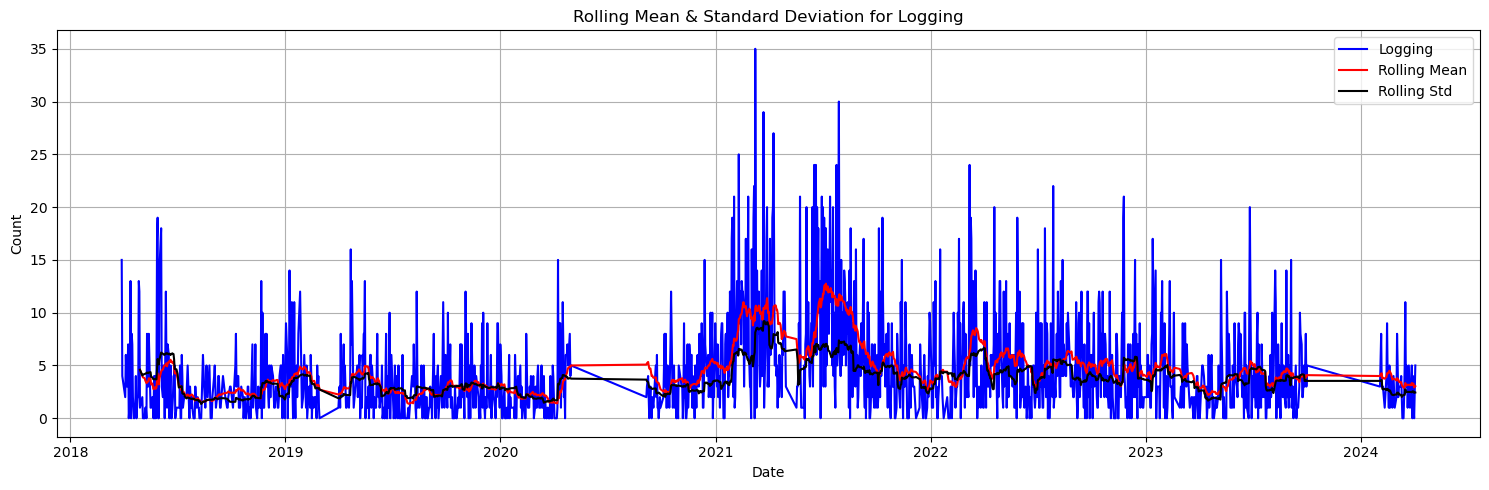

Results of Dickey-Fuller Test for Poaching:

Test Statistic: -5.312173949018441
p-value: 5.16650654681524e-06
Number of Observations Used: 1553
Critical Values:
   1%: -3.4345677345088688
   5%: -2.8634028737525887
   10%: -2.5677617635268795



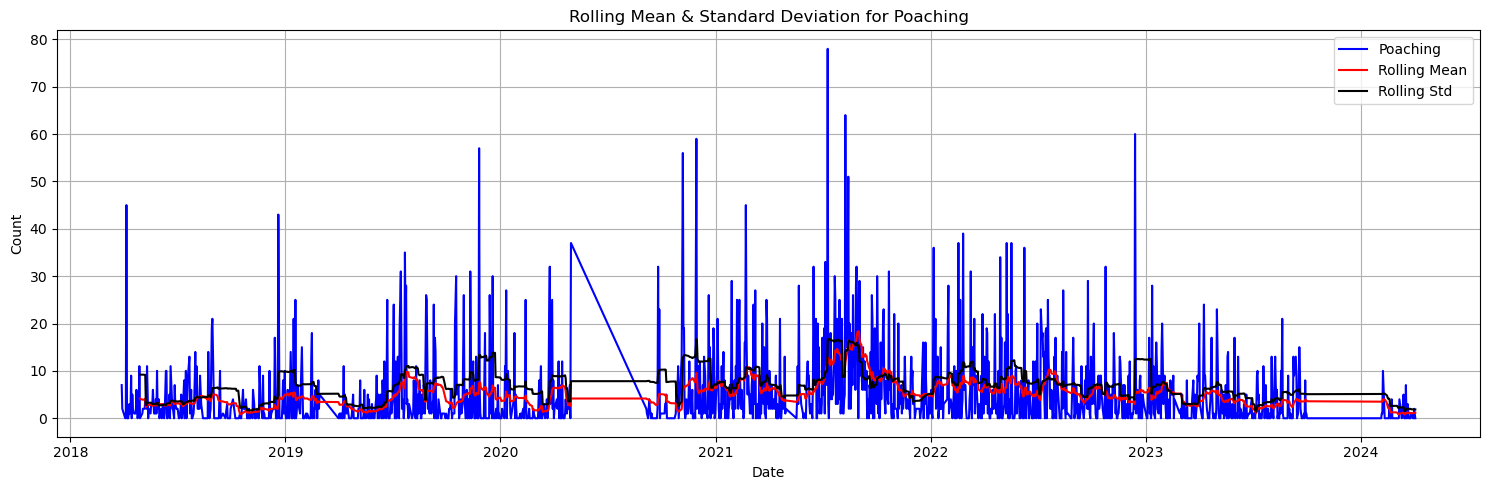

In [25]:

#import adfuller 
from statsmodels.tsa.stattools import adfuller

def Adfuller_rolling_statisticstest(Tseries_data):
    """
    The functions performs a dicker fuller test and returns the results.
    The functions calculates mean and standard deviation for "Logging" and "Poaching" columns
    provided the time series and plot the visualization.
    Parameters:
        Tseries_data (DataFrame): Time series in dataframe type.
    
    Returns:
        None
    """
    # Perform Augmented Dickey-Fuller test and plot rolling statistics for each column
    for column in ["Logging", "Poaching"]:
        # Perform Augmented Dickey-Fuller test
        result = adfuller(Tseries_data[column], autolag="AIC")
        
        # Print results
        print(f"Results of Dickey-Fuller Test for {column}:\n")
        print("Test Statistic:", result[0])
        print("p-value:", result[1])
        print("Number of Observations Used:", result[3])
        print("Critical Values:")
        for key, value in result[4].items():
            print(f"   {key}: {value}")
        print()
        
        # Calculate rolling statistics
        mean = Tseries_data[column].rolling(window=24, center=False).mean()
        std = Tseries_data[column].rolling(window=24, center=False).std()

        # Plot time series and rolling statistics
        fig, ax = plt.subplots(figsize=(15, 5))
        ax.plot(Tseries_data.index, Tseries_data[column], color='blue', label=column)
        ax.plot(mean.index, mean, color='red', label='Rolling Mean')
        ax.plot(std.index, std, color='black', label='Rolling Std')
        ax.legend(loc='best')
        ax.set_title(f'Rolling Mean & Standard Deviation for {column}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Count')
        ax.grid(True)
        plt.tight_layout()
        plt.show()

# execute function
Adfuller_rolling_statisticstest(time_data_copy["2018":])


### **Intepretations**
>The test statistic for logging is less negative than the critical values  
>For poaching, the test statistic is less negative than the critical values   
>The p-value for both poaching and logging are statistically significant
>Rolling statistics confirms both logging and poaching are not stationary

In Conclusion:   
> The time series is not stationary   



### DEALING WITH STATIONARITY   


In [26]:
#in order to stablize the mean of the time series data and remove stationarity we will employ differencing technique

##differencing 
time_series_diff = time_data_copy - time_data_copy.shift(1)

In [27]:
#check for missing values in the differenced data and drop if any

#check missing values 
print("Missing values:", time_series_diff.isna().sum())

#drop missing values 
time_series_diff.dropna(inplace= True)

#confirm missing values
print("Missing values:", time_series_diff.isna().sum())

Missing values: Illegal Activity
Logging     1
Poaching    1
dtype: int64
Missing values: Illegal Activity
Logging     0
Poaching    0
dtype: int64


Results of Dickey-Fuller Test for Logging:

Test Statistic: -12.567243606458502
p-value: 2.0407007197352763e-23
Number of Observations Used: 1549
Critical Values:
   1%: -3.434578644140842
   5%: -2.8634076888727376
   10%: -2.5677643275842597



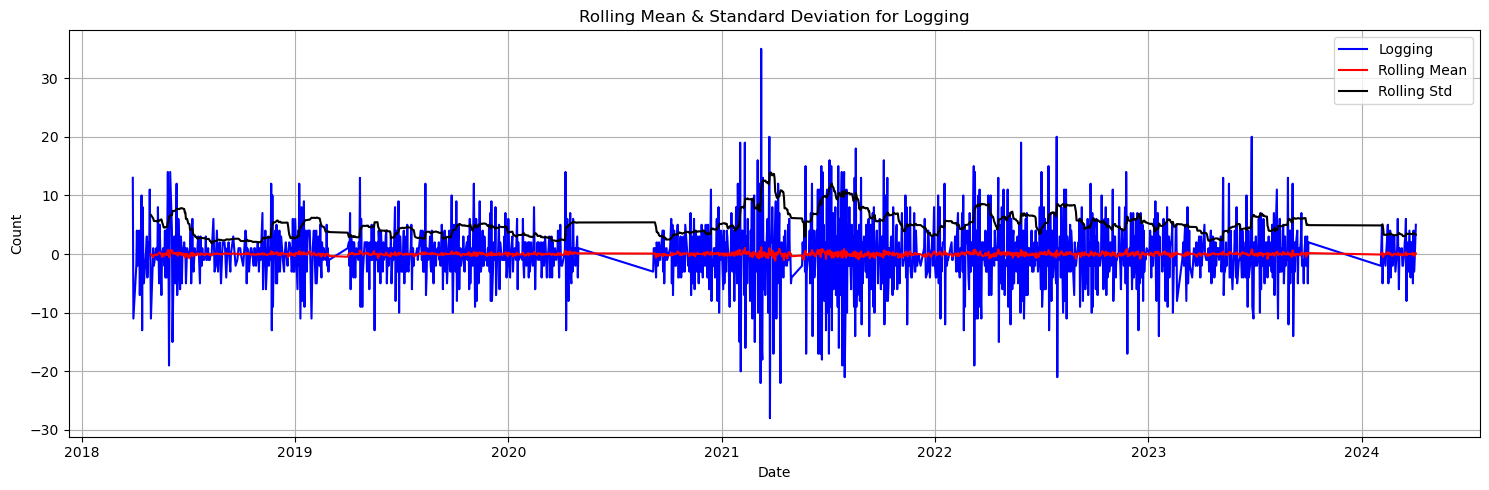

Results of Dickey-Fuller Test for Poaching:

Test Statistic: -14.443187232656815
p-value: 7.301843427724054e-27
Number of Observations Used: 1550
Critical Values:
   1%: -3.4345759114452012
   5%: -2.8634064827605656
   10%: -2.5677636853277837



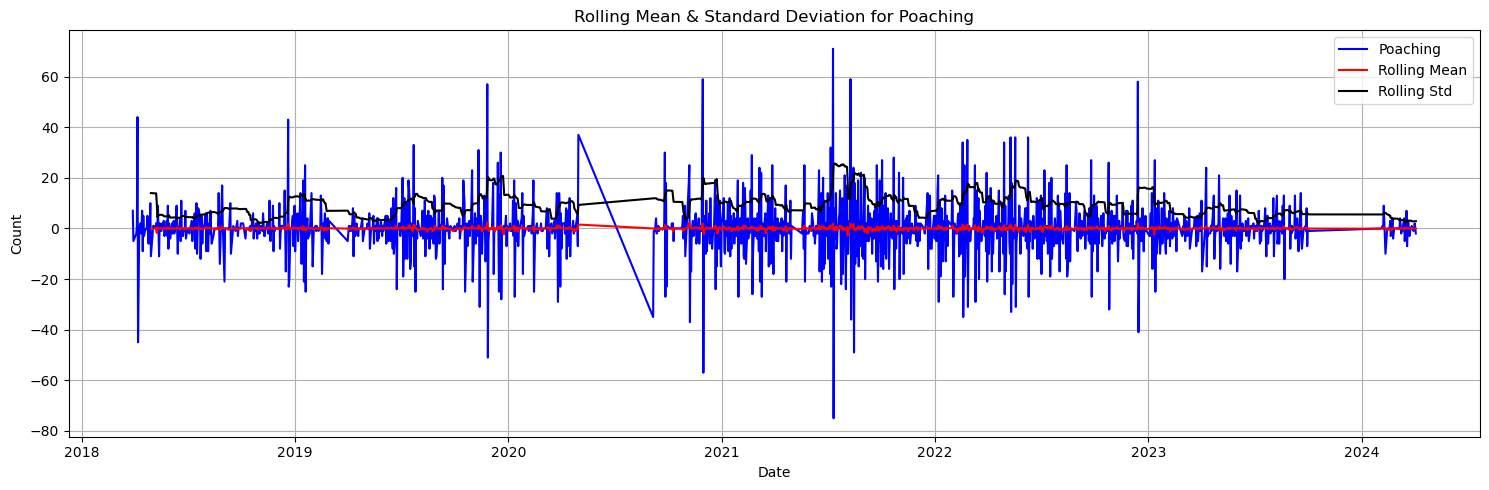

In [28]:
#perform test of differenced data
Adfuller_rolling_statisticstest(time_series_diff)

The results shows extreme low or lesser values for test statistics and p-value.  
The p-value is highy significant while the test statistics is way below the critical values   
Conclusion: Both logging and Poaching are highly likely to be stationary  
 

## TIME SERIES MODELLING USING ARIMA

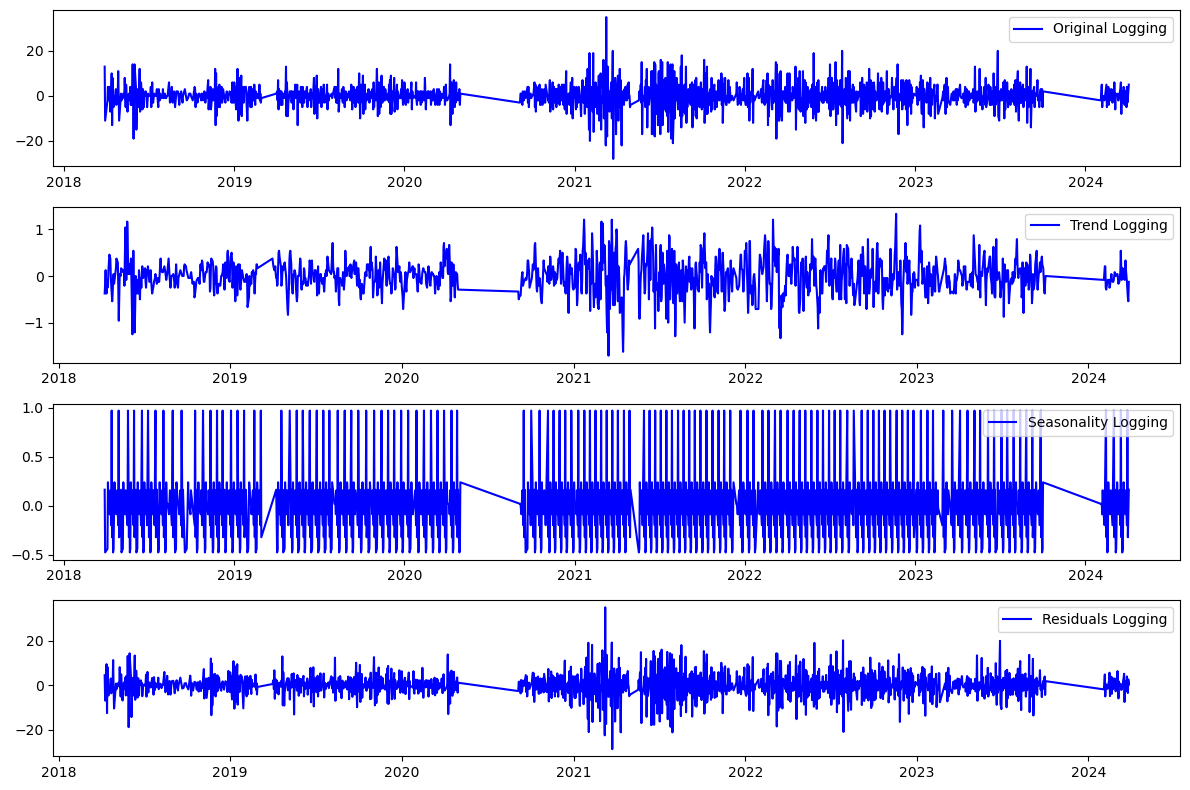

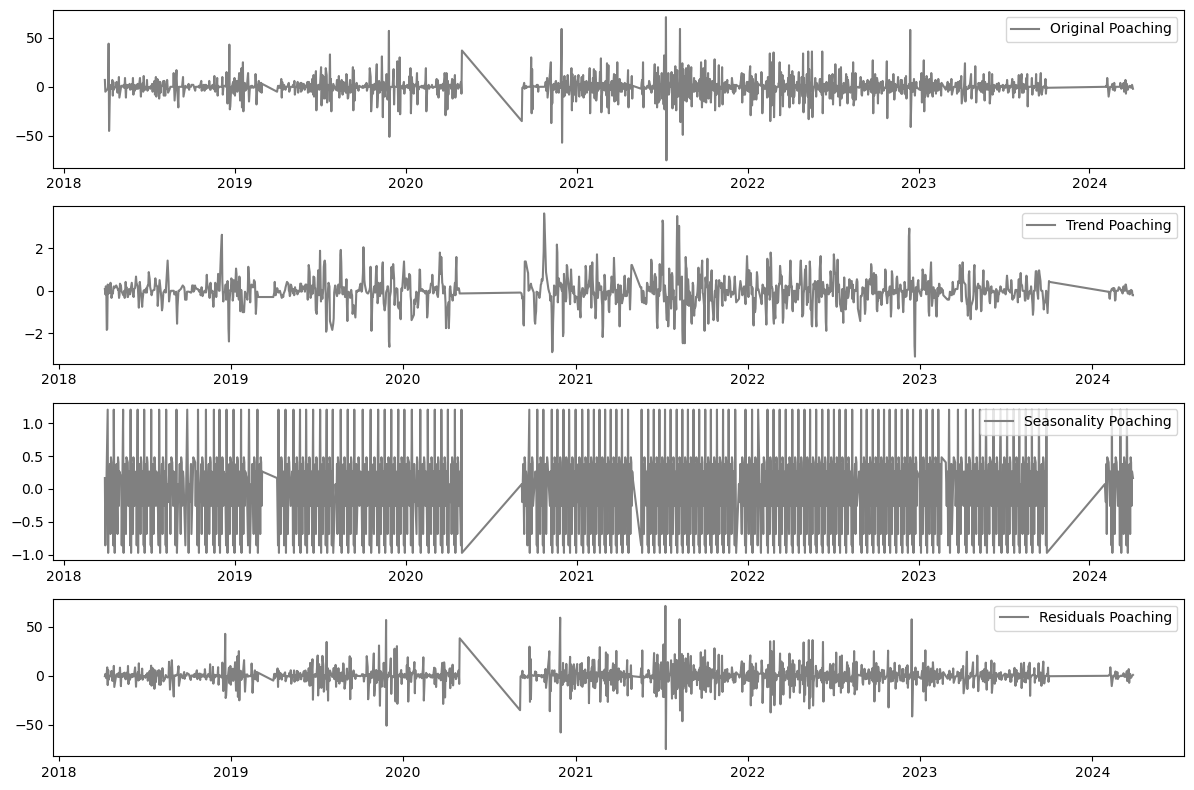

In [29]:
#Decomposing our time series data to visualize seasonality, trends, and residuals 

#importing seasonal decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose

#visualize the components of time series for Logging and Poaching Columns 
# Import and apply seasonal_decompose() for "Logging" column
decomposition_logging = seasonal_decompose(time_series_diff["Logging"], period=12)
trend_logging = decomposition_logging.trend
seasonal_logging = decomposition_logging.seasonal
residual_logging = decomposition_logging.resid

# Apply seasonal_decompose() for "Poaching" column
decomposition_poaching = seasonal_decompose(time_series_diff["Poaching"], period=12)
trend_poaching = decomposition_poaching.trend
seasonal_poaching = decomposition_poaching.seasonal
residual_poaching = decomposition_poaching.resid

# Plot gathered statistics for "Logging" column
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(time_series_diff["Logging"], label='Original Logging', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_logging, label='Trend Logging', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_logging, label='Seasonality Logging', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_logging, label='Residuals Logging', color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plot gathered statistics for "Poaching" column
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(time_series_diff["Poaching"], label='Original Poaching', color='grey')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_poaching, label='Trend Poaching', color='grey')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_poaching, label='Seasonality Poaching', color='grey')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_poaching, label='Residuals Poaching', color='grey')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


The graph above shows the trend, seasonality, and residual properties for both logging and poaching time series data. 

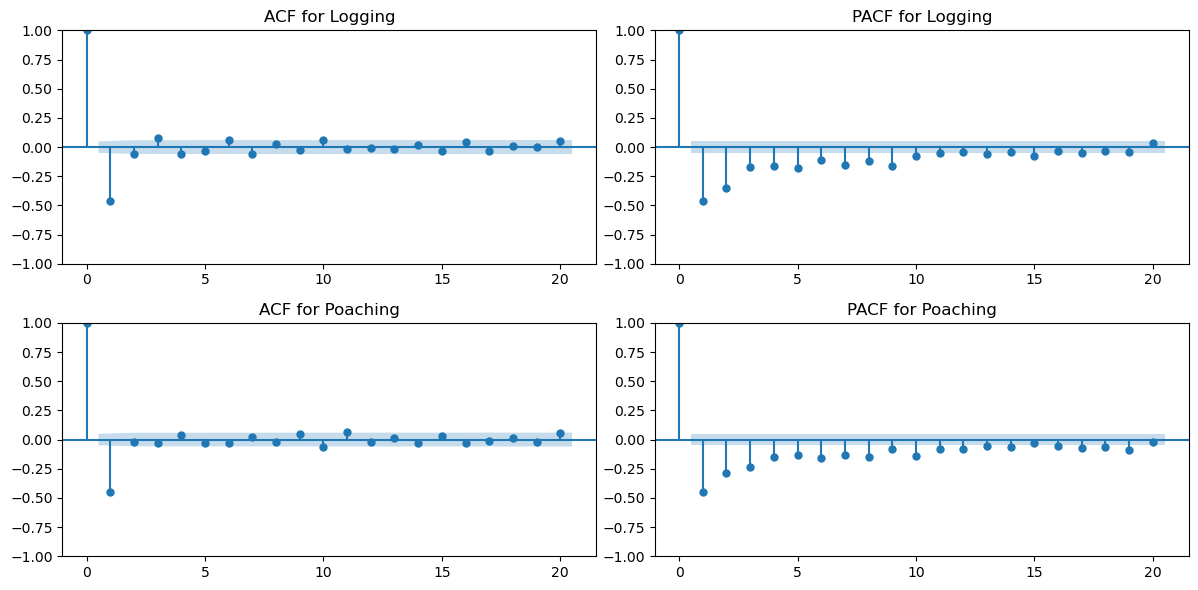

In [30]:
# Display the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots
# to identify the values of p (AR component), d (differencing), and q (MA component)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for "Logging"
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

plot_acf(time_series_diff["Logging"], ax=axes[0, 0], lags=20, alpha=0.05)
axes[0, 0].set_title('ACF for Logging')

plot_pacf(time_series_diff["Logging"], ax=axes[0, 1], lags=20, alpha=0.05, method="ywm")
axes[0, 1].set_title('PACF for Logging')

# Plot ACF and PACF for "Poaching"
plot_acf(time_series_diff["Poaching"], ax=axes[1, 0], lags=20, alpha=0.05)
axes[1, 0].set_title('ACF for Poaching')

plot_pacf(time_series_diff["Poaching"], ax=axes[1, 1], lags=20, alpha=0.05, method="ywm")
axes[1, 1].set_title('PACF for Poaching')

plt.tight_layout()
plt.show()


### ARIMA MODELING

In [31]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Instantiate an ARIMA(order 1,1,1) model to the simulated data
# for Logging 
mod_logging = ARIMA(time_series_diff["Logging"], order=(1,1,1))

#for Poaching
mod_poaching = ARIMA(time_series_diff["Poaching"], order=(1,1,1))
print(mod_logging)
print(mod_poaching)


C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ign

In [32]:
#fit the model
logging_results = mod_logging.fit()
poaching_results = mod_poaching.fit()

In [33]:
#Evaluate model performance using Root mean squared error
from sklearn.metrics import mean_squared_error

# Forecast using ARIMA model
logging_forecast = logging_results.forecast(steps=len(time_series_diff["Logging"]))
Poaching_forecast = poaching_results.forecast(steps=len(time_series_diff["Poaching"]))
# Calculate RMSE
logging_rmse = np.sqrt(mean_squared_error(time_series_diff["Logging"], logging_forecast))
poaching_rmse = np.sqrt(mean_squared_error(time_series_diff["Poaching"], Poaching_forecast))
print("RMSE of Logging model:", logging_rmse)
print("RMSE of Poaching model:", poaching_rmse)

RMSE of Logging model: 5.572211139180595
RMSE of Poaching model: 10.345967545130872


C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [34]:
#print result summary 
print("Logging Model results", "\n", logging_results.summary(), "\n\n")
print ("Poaching Model Results", "\n", poaching_results.summary())


Logging Model results 
                                SARIMAX Results                                
Dep. Variable:                Logging   No. Observations:                 1573
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4740.814
Date:                Sat, 04 May 2024   AIC                           9487.628
Time:                        04:15:35   BIC                           9503.708
Sample:                             0   HQIC                          9493.604
                               - 1573                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4673      0.016    -30.097      0.000      -0.498      -0.437
ma.L1         -0.9999      0.200     -5.004      0.000      -1.391      -0.608
sigma2        24.2525      4

Certainly! Let's delve deeper into the results of each SARIMAX model for logging and poaching:

**Logging Model Results:**
- The negative log likelihood value (-4740.814) suggests that the model is providing a reasonable fit to the data.  
- AIC (Akaike Information Criterion): The AIC value (9487.628) is a measure of the model's goodness of fit, balancing the trade-off between the goodness of fit and the complexity of the model. Lower AIC values indicate better fitting models.  
- BIC (Bayesian Information Criterion): Similar to AIC, BIC (9503.708) penalizes the model for complexity, with lower values indicating better fitting models. In this case, the AR coefficient (ar.L1) is -0.4673, indicating a negative correlation   between past and future values, while the MA coefficient (ma.L1) is close to -1, suggesting a strong effect of past errors on future predictions.
- Variance (sigma2): A higher variance value (24.2525) suggests higher levels of unpredictability in the data.
- In this case, the significant Q statistic (40.70) indicates evidence of autocorrelation in the residuals, suggesting that the model may not adequately capture all the temporal dependencies in the data.     
- The significant JB statistic (450.00) suggests that the residuals deviate from a normal distribution, indicating potential model misspecification.
   
**Poaching Model Results:**    
- The negative log likelihood value (-5729.008) suggests that the model provides a reasonable fit to the data.   
- The AIC value (11464.016) is higher than that of the logging model, indicating a relatively poorer fit for the poaching model compared to the logging model.    
- The BIC value (11480.097) is higher for the poaching model compared to the logging model.
- In this case, the AR coefficient (ar.L1) is -0.4512, and the MA coefficient (ma.L1) is close to -1, indicating a strong effect of past errors on future predictions, similar to the logging model.    
- Variance: The variance term (sigma2) for the poaching model (85.2658) is significantly higher than that of the logging model, suggesting higher levels of unpredictability in the poaching data compared to the logging data.    
  - The Q statistic (26.54) for the poaching model is significant, indicating evidence of autocorrelation in the residuals.   
  - The JB statistic (4068.26) for the poaching model is significant, suggesting that the residuals deviate from a normal distribution.    
  - The H statistic (0.92) for the poaching model is not significant, indicating that the variance of the residuals may be relatively constant over time.     

Overall, while both models provide reasonable fits to the data, there are some areas of concern regarding autocorrelation, non-normality of residuals, and heteroskedasticity, which may require further investigation and model refinement.    

### Forecasting

C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


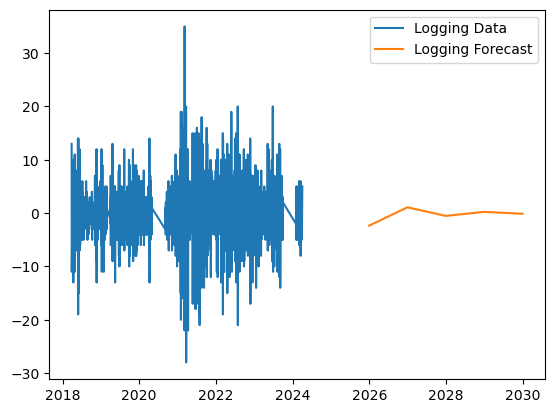

In [35]:
# Making predictions for future time points
n_forecast = 5  # number of time points to forecast
forecast_logging = logging_results.forecast(steps=n_forecast)

# Plotting the original data and the forecast
plt.plot(time_series_diff.index, time_series_diff["Logging"], label='Logging Data')

# Generating future dates for the forecast in years
start_index = time_series_diff.index[-1] + pd.DateOffset(years=1)
end_index = start_index + pd.DateOffset(years=n_forecast)

# Plotting the forecasted data with yearly intervals
plt.plot(pd.date_range(start=start_index, end=end_index, freq='Y'), forecast_logging, label='Logging Forecast')

plt.legend()
plt.show()

The forecasting shows:   
Increase from 2025 to 2027: During this period, the forecasted logging activity is showing an upward trend   
Slight Decrease from 2027 to 2028:   
Flattening Trend After 2028: The flattening trend indicates that logging activity has stabilized or reached a plateau after 2028  

C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


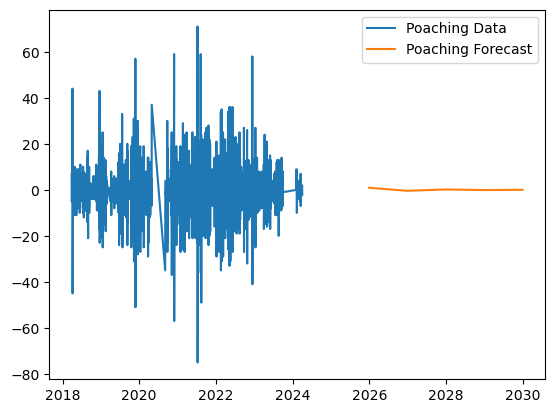

In [36]:
# Making predictions for future time points
n_forecast = 5  # number of time points to forecast
forecast_poaching = poaching_results.forecast(steps=n_forecast)

# Plotting the original data and the forecast
plt.plot(time_series_diff.index, time_series_diff["Poaching"], label='Poaching Data')

# Generating future dates for the forecast in years
start_index = time_series_diff.index[-1] + pd.DateOffset(years=1)
end_index = start_index + pd.DateOffset(years=n_forecast)

# Plotting the forecasted data with yearly intervals
plt.plot(pd.date_range(start=start_index, end=end_index, freq='Y'), forecast_poaching, label='Poaching Forecast')

plt.legend()
plt.show()

The poaching forecast shows a slight decrease in poaching activities from 2025 to 2027 and then it flattens

## MULTIVARIATE TIME SERIES MODELLING Vector Auto Regression(VAR)

In [37]:
from statsmodels.tsa.api import VAR

# Combine the "Logging" and "Poaching" columns into a single DataFrame
data = time_series_diff[["Logging", "Poaching"]]

# Fit a VAR(1) model
model = VAR(data)
VAR_results = model.fit(maxlags=1)  # You may adjust the maximum lag order as needed

# Print model summary
print(VAR_results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 04, May, 2024
Time:                     04:15:36
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    7.65314
Nobs:                     1572.00    HQIC:                   7.64028
Log likelihood:          -10454.4    FPE:                    2064.58
AIC:                      7.63268    Det(Omega_mle):         2056.72
--------------------------------------------------------------------
Results for equation Logging
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.006945         0.124085           -0.056           0.955
L1.Logging         -0.466264         0.022288          -20.920           0.000
L1.Poaching        -0.007870         0.011989           -0.656    

C:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


For the "Logging" Equation:   

    Constant (const): The intercept term is approximately -0.006945. However, it is not statistically significant (p-value > 0.05), suggesting that the mean of the "Logging" variable does not significantly differ from zero.   
    L1.Logging Coefficient: The coefficient for the lagged value of "Logging" is approximately -0.466264. It is statistically significant (p-value < 0.05), indicating a negative relationship between the current value of "Logging" and its lagged value. In simpler terms, as the logging activity decreases (or increases) in the past, it tends to decrease (or increase) in the present.     
    L1.Poaching Coefficient: The coefficient for the lagged value of "Poaching" is approximately -0.007870. However, it is not statistically significant (p-value > 0.05), suggesting that the past value of "Poaching" does not have a significant impact on the current value of "Logging".      

For the "Poaching" Equation:    

    Constant (const): The intercept term is approximately -0.003744, which is not statistically significant (p-value > 0.05), implying that the mean of the "Poaching" variable does not significantly differ from zero.    
    L1.Logging Coefficient: The coefficient for the lagged value of "Logging" is approximately 0.105312. It is statistically significant (p-value < 0.05), indicating a positive relationship between the current value of "Poaching" and the lagged value of "Logging". In other words, past values of "Logging" have a significant impact on the current value of "Poaching".     
    L1.Poaching Coefficient: The coefficient for the lagged value of "Poaching" is approximately -0.452059, and it is statistically significant (p-value < 0.05). This suggests a negative relationship between the current value of "Poaching" and its lagged value. It implies that as the poaching activity decreases (or increases) in the past, it tends to decrease (or increase) in the present.   

Correlation Matrix of Residuals:    

    The correlation between the residuals of the "Logging" and "Poaching" equations is approximately 0.029292, indicating a weak positive correlation. This suggests that there might be some common underlying factors affecting both variables beyond what is captured by the model.   

These interpretations provide insights into how the past values of "Logging" and "Poaching" influence their current values and their interrelationship, as captured by the VAR model.    

In [38]:
# Forecast using VAR model
VAR_forecast = VAR_results.forecast(y=data.values, steps=len(data))

# Calculate RMSE
VAR_rmse = np.sqrt(mean_squared_error(data, VAR_forecast))
print("RMSE of VAR model:", VAR_rmse)


RMSE of VAR model: 8.308810304110867


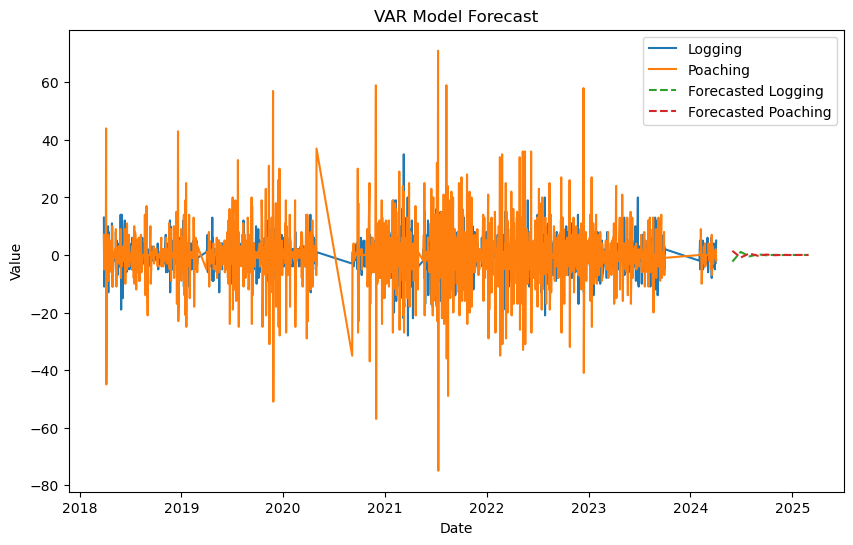

In [39]:
#step 1: importing VAR
from statsmodels.tsa.api import VAR

# Step 2: Forecast using the VAR model
forecast_steps = 10  # Adjust as needed
VAR_forecast = VAR_results.forecast(y=data.values, steps=forecast_steps)

# Step 3: Plotting the original data and forecast
plt.figure(figsize=(10, 6))

# Plotting original data
plt.plot(data.index, data['Logging'], label='Logging')
plt.plot(data.index, data['Poaching'], label='Poaching')

# Plotting forecasted data
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
plt.plot(forecast_index, VAR_forecast[:, 0], linestyle='--', label='Forecasted Logging')
plt.plot(forecast_index, VAR_forecast[:, 1], linestyle='--', label='Forecasted Poaching')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('VAR Model Forecast')
plt.legend()
plt.show()

#### TIME SERIES MODELLING: XG BOOST 

In [40]:
#import necessary libaries
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plot

In [41]:
#check statistical summary of the data
time_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Illegal Activity,,,,,,,,
Logging,1574.0,4.568615,4.623394,0.0,1.0,3.0,6.0,35.0
Poaching,1574.0,5.273189,8.124529,0.0,0.0,2.0,7.0,78.0


It seems most values are distributed near the mean, with higher values possibly being outliers

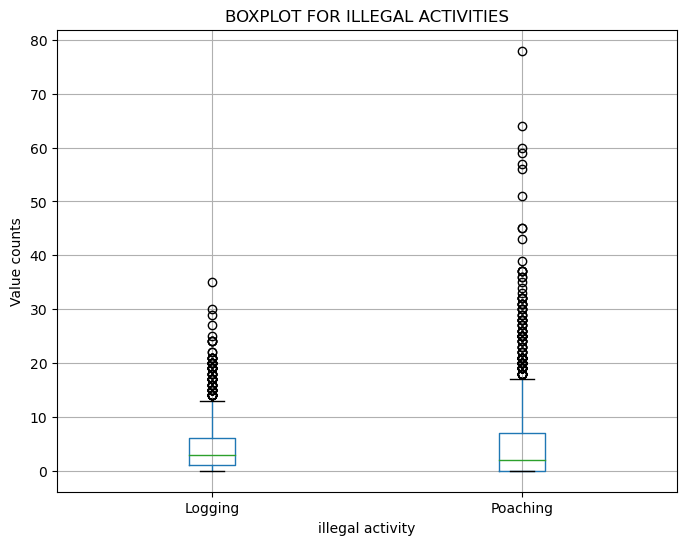

In [42]:
#confirm outliers using boxplots
plt.figure(figsize=(8, 6))
time_data_copy.boxplot(grid=True )
plt.title("BOXPLOT FOR ILLEGAL ACTIVITIES")
plt.xlabel("illegal activity")
plt.ylabel("Value counts")
plt.show();

The dataset has outliers, which will be retained for their significant insights.

Keeping outliers will make our models more robust by ensuring they are trained on the full range of data. These Outliers can also provide valuable insights in research and exploratory data analysis, leading to interesting findings and hypotheses for further investigation which should consider factors like data collection errors, measurement variability, and natural variability.


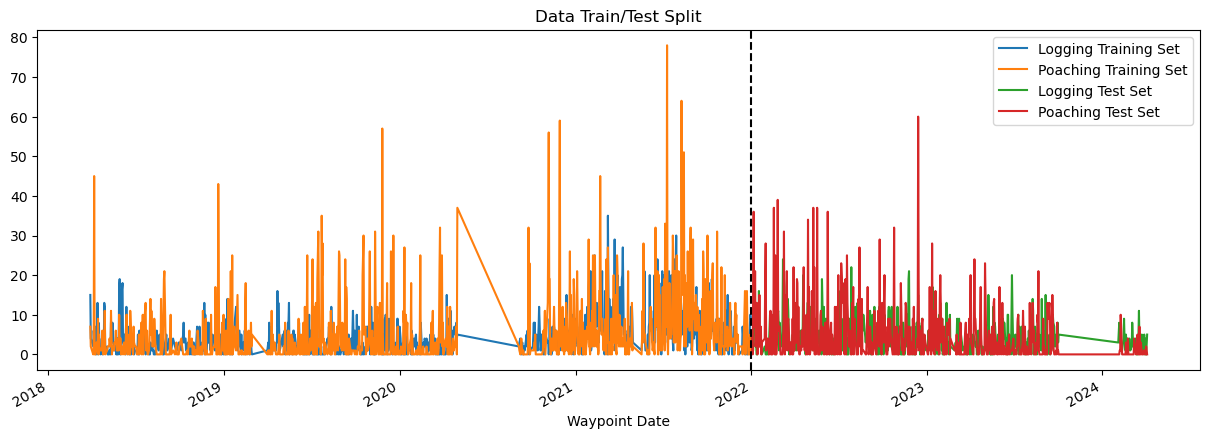

In [43]:
#perform a train and test split 
time_data_copy = time_data_copy["2018":]
train = time_data_copy.loc[time_data_copy.index < '01-01-2022']
test = time_data_copy.loc[time_data_copy.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Logging Training Set', 'Poaching Training Set','Logging Test Set','Poaching Test Set'])
plt.show()

The graph shows a successful train/test split. The data is therefore ready for modelling

   # FEATURE ENGINEERING

In [44]:
#we performed a feature engineer to isolate data in its different timestamps
#that is in hours, week, quartely, monthly, day, and week
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

#call function using time series copy dataframe 
#and preview dataset
featured_time_series = create_features(time_data_copy)
featured_time_series.head(3)

Illegal Activity,Logging,Poaching,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Waypoint Date,,,,,,,,,,
2018-03-29,15.0,7.0,0,3,1,3,2018,88,29,13
2018-03-30,4.0,2.0,0,4,1,3,2018,89,30,13
2018-04-04,2.0,0.0,0,2,2,4,2018,94,4,14


# VISUALIZING  FEATURE/RELATIONSHIP 

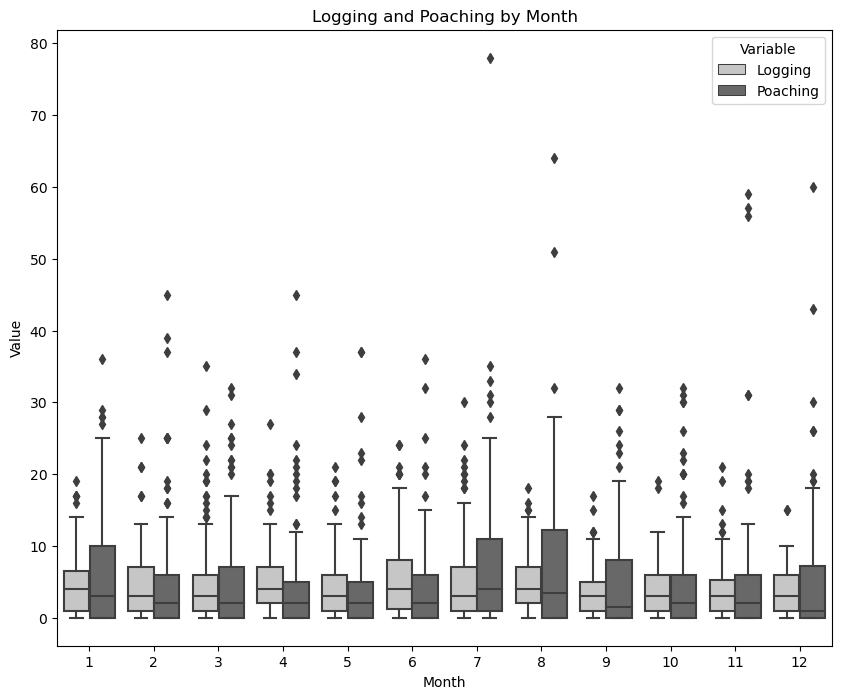

In [45]:

# Melt the DataFrame to combine 'Logging' and 'Poaching' into a single variable
melted_df = featured_time_series.melt(id_vars=['month'], value_vars=['Logging', 'Poaching'], 
                                      var_name='Variable', value_name='Value')

# Plot the combined boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=melted_df, x='month', y='Value', hue='Variable', palette='Greys')
plt.title('Logging and Poaching by Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Variable')
plt.show()


##  MODELING

In [46]:
# Combine "Logging" and "Poaching" columns into a single target variable
train['Illegal_Activity'] = train['Logging'] + train['Poaching']
test['Illegal_Activity'] = test['Logging'] + test['Poaching']

# Create features
train = create_features(train)
test = create_features(test)

# Define features and target
FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'Illegal_Activity'

# Split data into features and target variables
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

#Instatiate Xgb model and set parameters
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

#fit data
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[04:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:14.08874	validation_1-rmse:12.43968
[100]	validation_0-rmse:9.87364	validation_1-rmse:9.32820
[200]	validation_0-rmse:8.99795	validation_1-rmse:10.59323
[300]	validation_0-rmse:8.70139	validation_1-rmse:11.32794
[400]	validation_0-rmse:8.57119	validation_1-rmse:11.63446
[500]	validation_0-rmse:8.47368	validation_1-rmse:11.78653
[600]	validation_0-rmse:8.37464	validation_1-rmse:11.86578
[700]	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
#reset parameters using 99 n estimators since it produced an appropriate rmse
improved_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=99,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
#Fit data
improved_reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[04:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:14.08874	validation_1-rmse:12.43968
[98]	validation_0-rmse:9.90846	validation_1-rmse:9.30754
[04:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=99, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# FEATURE IMPORTANCE 

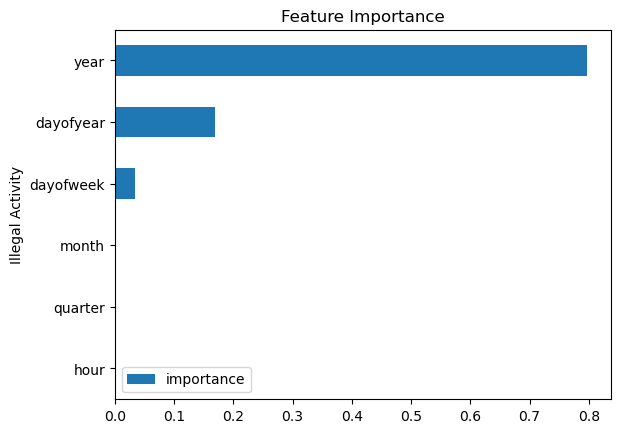

In [48]:
#we performed a feature importance to determine the appropriate feature to use
#this is significant in improving model using the best feature
fi = pd.DataFrame(data= improved_reg.feature_importances_,
                  index=X_train.columns,
                  columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()


The graph shows the most important feature is year, followed by day of year,then day of week. The feture year should be highly considered when improving the model. This feature is highly significant in forecasting illegal activities in ASF

# FORECAST AND TEST

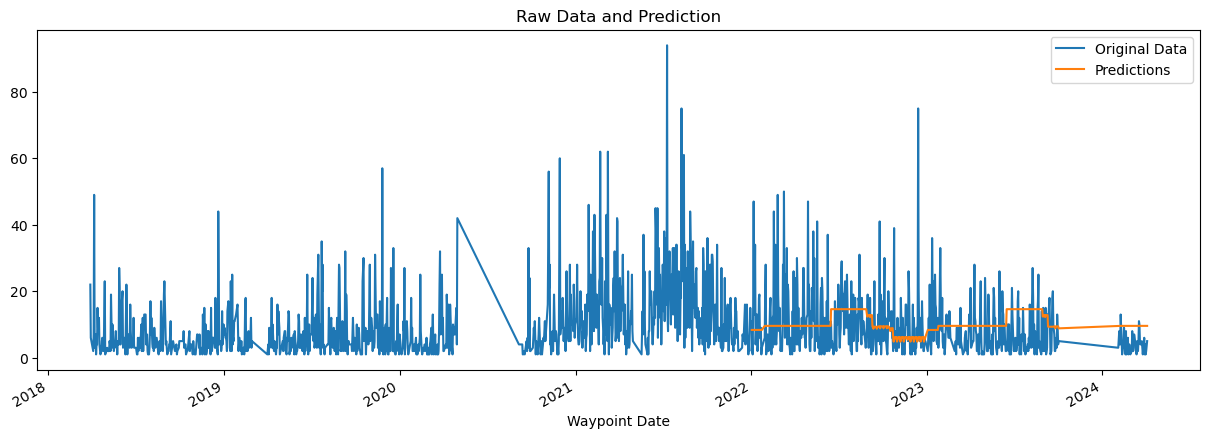

In [49]:
#We performed forecast and test the model
test['prediction'] = improved_reg.predict(X_test)

# Assuming df is your DataFrame

df = featured_time_series.merge(test[['prediction']], how='left', left_index=True, right_index=True)
df['target'] = df['Poaching'] + df['Logging']
#df = df.merge(target, how='left', left_index=True, right_index=True)
ax = df[['target']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Original Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

Model also predicted true predictions as seen in the orange line. However, the model needs improvement for better predictions

In [50]:
#Predicted values of Illegal activities
test['prediction'].tolist()

[8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 8.358511924743652,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,
 9.582367897033691,


In [51]:
#We evaluate the model performance using rmse
score = np.sqrt(mean_squared_error(test['Illegal_Activity'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}', '\n')
print ("RMSE Score on Train Test: 9.91")

RMSE Score on Test set: 9.31 

RMSE Score on Train Test: 9.91


The rmse shows the data fitted well. The model performed well in training and test. However, the rmse of 9 can be improved to much lower rmse. In general, a lower RMSE indicates better performance of the model in terms of its ability to accurately predict the target variable.

### Improving the model

In [52]:
# Combine "Logging" and "Poaching" columns into a single target variable
train['Illegal_Activity'] = train['Logging'] + train['Poaching']
test['Illegal_Activity'] = test['Logging'] + test['Poaching']

# Create features
train = create_features(train)
test = create_features(test)

# Define features and target
FEATURES = ['dayofyear', 'year','dayofweek']
TARGET = 'Illegal_Activity'

# Split data into features and target variables
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

#Instatiate Xgb model and set parameters
best_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

#fit data
best_reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[04:15:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:14.08874	validation_1-rmse:12.43968
[100]	validation_0-rmse:9.87364	validation_1-rmse:9.32820
[200]	validation_0-rmse:8.99795	validation_1-rmse:10.59323
[300]	validation_0-rmse:8.70139	validation_1-rmse:11.32794
[400]	validation_0-rmse:8.57119	validation_1-rmse:11.63446
[500]	validation_0-rmse:8.47368	validation_1-rmse:11.78653
[600]	validation_0-rmse:8.37328	validation_1-rmse:11.86540
[700]	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

The model performs best at around 200 iterations with a validation_0-rmse:9.00	validation_1-rmse:10.59
But at (around iteration 200) suggests that the model might be overfitting to the training data, as it performs worse on unseen data (validation set)

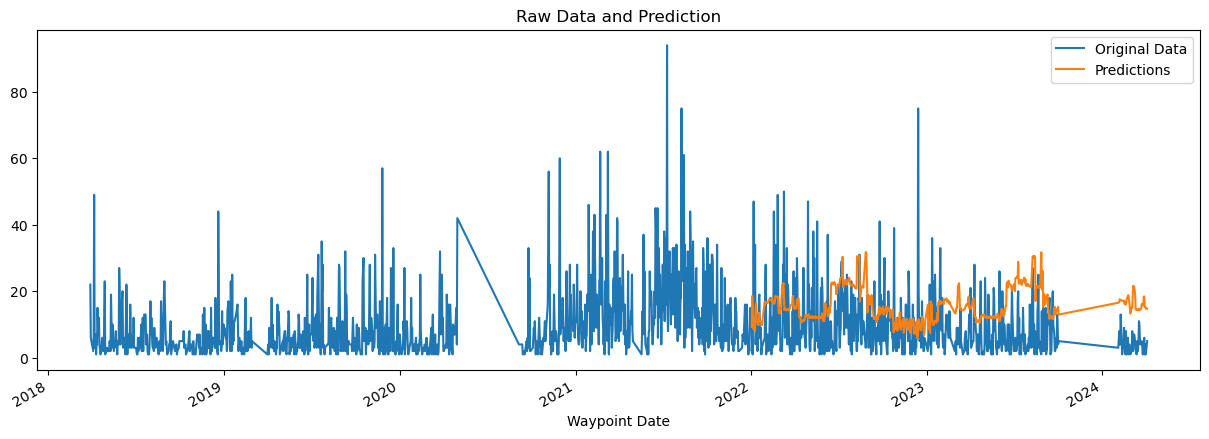

In [53]:
#Performed forecast and test on the new improved model
test['prediction'] = best_reg.predict(X_test)

# Assuming df is your DataFrame
df = featured_time_series.merge(test[['prediction']], how='left', left_index=True, right_index=True)
df['target'] = df['Poaching'] + df['Logging']
#df = df.merge(target, how='left', left_index=True, right_index=True)
ax = df[['target']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Original Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [54]:
#Predicted values of Illegal activities
test['prediction'].tolist()

[9.290363311767578,
 18.534770965576172,
 15.974239349365234,
 8.803865432739258,
 8.803865432739258,
 8.404131889343262,
 8.227982521057129,
 8.162221908569336,
 15.115073204040527,
 16.358800888061523,
 10.951600074768066,
 10.951600074768066,
 10.725563049316406,
 9.782731056213379,
 13.531068801879883,
 11.111525535583496,
 10.951600074768066,
 10.951600074768066,
 10.725563049316406,
 10.549415588378906,
 9.782731056213379,
 16.832103729248047,
 16.065418243408203,
 16.673377990722656,
 16.58339500427246,
 16.4234619140625,
 16.4234619140625,
 17.079557418823242,
 17.423011779785156,
 17.404067993164062,
 17.404067993164062,
 17.404067993164062,
 17.621654510498047,
 16.85497283935547,
 17.198427200317383,
 17.33940887451172,
 16.278366088867188,
 16.278366088867188,
 16.278366088867188,
 16.720529556274414,
 18.488229751586914,
 18.246915817260742,
 18.387895584106445,
 18.350522994995117,
 18.350522994995117,
 17.1058349609375,
 13.763151168823242,
 13.33992862701416,
 13.480908

In [55]:
#We evaluate the model performance using rmse
score = np.sqrt(mean_squared_error(test['Illegal_Activity'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}', '\n')
print ("RMSE Score on Train Test: 9.00")

RMSE Score on Test set: 12.13 

RMSE Score on Train Test: 9.00


 while our model shows a slight decrease in performance when applied to unseen data, its performance on both the training and test sets suggests it's doing a decent job of capturing patterns in the data without overfitting excessively.

### Recommendation:   
Based on the analysis of historical data from 2018 to 2024, it is evident that illegal activities in the Arabuko-Sokoke Forest have shown a positive trend, with an increasing number of incidents over time. To address this concerning trend, it is recommended to focus: 

1. On enhancing the predictive models developed using time series analysis techniques.
   >Given the positive trend observed in illegal activities, it becomes imperative to refine and optimize the predictive models to better forecast future occurrences of illegal logging and poaching. This can be achieved by incorporating more granular data, such as seasonal variations, spatial dynamics, and socio-economic factors influencing illegal activities.

2. Use of ensemble techniques, which combine the strengths of multiple algorithms such as ARIMA, VAR, and XGBoost, could further improve the accuracy and robustness of the predictive models.
   >Ensemble methods can effectively mitigate the weaknesses of individual algorithms and provide more reliable forecasts.

3. Continuous monitoring and evaluation of the predictive models' performance, using metrics such as Root Mean Squared Error (RMSE), should be undertaken to ensure their effectiveness in guiding conservation interventions and law enforcement strategies.

By refining the predictive models and enhancing their accuracy in forecasting illegal activities, stakeholders can proactively implement targeted conservation strategies and allocate resources more efficiently to mitigate the threats posed to the Arabuko-Sokoke Forest ecosystem and support the livelihoods of local communities.

In [58]:
test['prediction'].describe()

count    595.000000
mean      15.826393
std        4.999730
min        5.990283
25%       12.030849
50%       14.817496
75%       18.599734
max       31.746716
Name: prediction, dtype: float64

In [65]:
#pip install joblib
from joblib import dump
import pickle

#Serialize and save the model to a joblib file
dump(reg, 'model.joblib')

#Serialize and save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(reg, file)

### Conclusion
In conclusion, the integration of machine learning techniques into conservation planning and management offers a promising approach to combat illegal activities threatening the Arabuko-Sokoke Forest. By harnessing the power of predictive analytics, stakeholders can work towards a sustainable future for ASF, preserving its biodiversity and ecosystem services for generations to come.   
>"In harnessing the power of predictive analytics, we chart a course towards a sustainable future for the Arabuko-Sokoke Forest, preserving its biodiversity and ecosystem services for generations to come”
― Mlati,Philip, Stella, Ahmed, and Allan